# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 10.11.2020

Мягкий дедлайн: 01:59MSK 23.11.2019

Жесткий дедлайн: 01:59MSK 27.11.2019

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/21899 нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

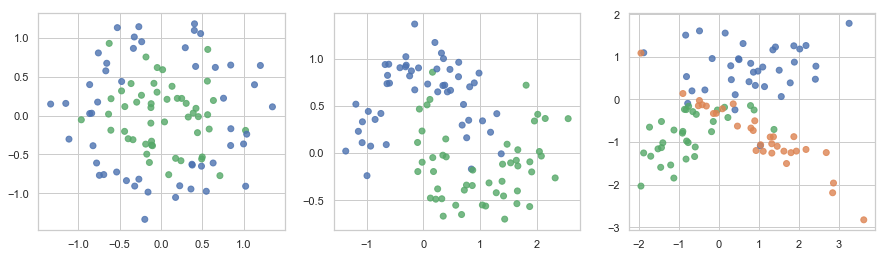

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

Prediction for 0 dataset:
Train accuracy = 1.000000
Test accuracy = 0.700000

Prediction for 1 dataset:
Train accuracy = 1.000000
Test accuracy = 0.766667

Prediction for 2 dataset:
Train accuracy = 1.000000
Test accuracy = 0.766667



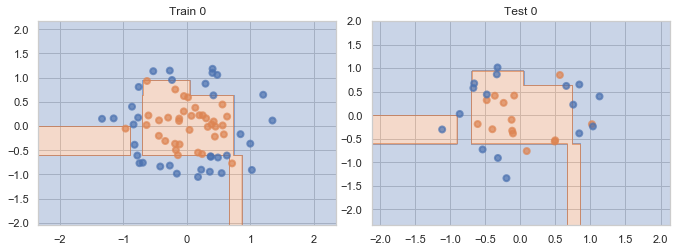

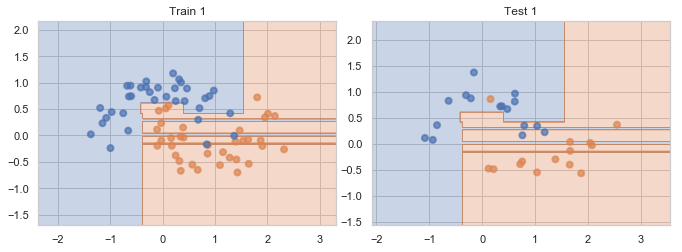

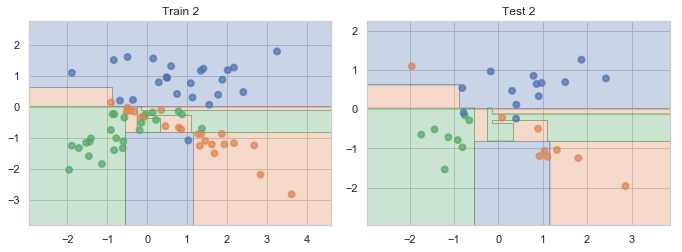

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

for i in range(len(datasets)):
    X, y = datasets[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    dr  = DecisionTreeClassifier().fit(X_train, y_train)
    print("Prediction for {} dataset:".format(i))
    print("Train accuracy = %.6f" % accuracy_score(y_train, dr.predict(X_train)))
    print("Test accuracy = %.6f\n" % accuracy_score(y_test, dr.predict(X_test)))

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plot_surface(dr, X_train, y_train)
    plt.title('Train {}'.format(i))
    plt.subplot(1, 2, 2)
    plot_surface(dr, X_test, y_test)
    plt.title('Test {}'.format(i))

Prediction for 0 dataset:
Train accuracy = 0.642857
Test accuracy = 0.400000

Prediction for 1 dataset:
Train accuracy = 0.871429
Test accuracy = 0.833333

Prediction for 2 dataset:
Train accuracy = 0.800000
Test accuracy = 0.900000



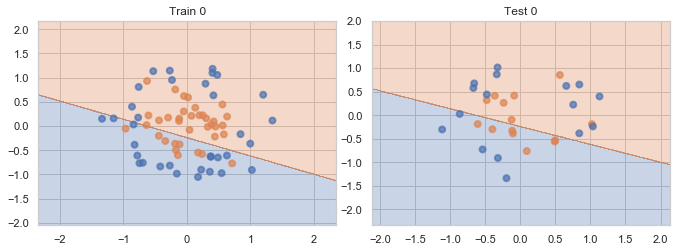

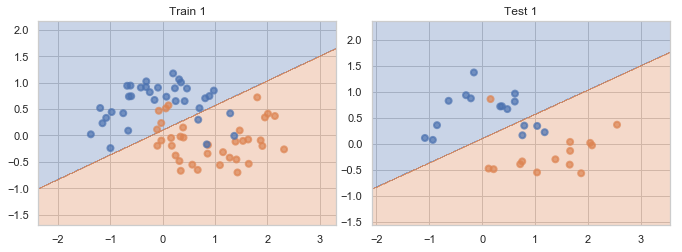

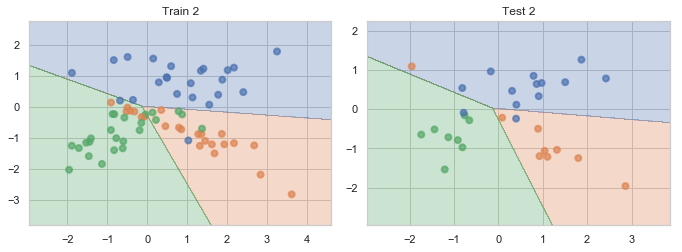

In [7]:
# Сравним результаты с логистической регрессией:
from sklearn.linear_model import LogisticRegression

for i in range(len(datasets)):
    X, y = datasets[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    lr  = LogisticRegression().fit(X_train, y_train)
    print("Prediction for {} dataset:".format(i))
    print("Train accuracy = %.6f" % accuracy_score(y_train, lr.predict(X_train)))
    print("Test accuracy = %.6f\n" % accuracy_score(y_test, lr.predict(X_test)))

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plot_surface(lr, X_train, y_train)
    plt.title('Train {}'.format(i))
    plt.subplot(1, 2, 2)
    plot_surface(lr, X_test, y_test)
    plt.title('Test {}'.format(i))

__Ответ:__ Видим, что деревья слишком переучились под обучающую выборку

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Prediction for 2 dataset (max_depth=None, min_samples_leaf=1):
Train accuracy = 1.000000
Test accuracy = 0.766667

Prediction for 2 dataset (max_depth=None, min_samples_leaf=5):
Train accuracy = 0.900000
Test accuracy = 0.866667

Prediction for 2 dataset (max_depth=None, min_samples_leaf=15):
Train accuracy = 0.857143
Test accuracy = 0.900000

Prediction for 2 dataset (max_depth=5, min_samples_leaf=1):
Train accuracy = 0.914286
Test accuracy = 0.766667

Prediction for 2 dataset (max_depth=5, min_samples_leaf=5):
Train accuracy = 0.900000
Test accuracy = 0.866667

Prediction for 2 dataset (max_depth=5, min_samples_leaf=15):
Train accuracy = 0.857143
Test accuracy = 0.900000

Prediction for 2 dataset (max_depth=3, min_samples_leaf=1):
Train accuracy = 0.871429
Test accuracy = 0.866667

Prediction for 2 dataset (max_depth=3, min_samples_leaf=5):
Train accuracy = 0.857143
Test accuracy = 0.900000

Prediction for 2 dataset (max_depth=3, min_samples_leaf=15):
Train accuracy = 0.857143
Test a

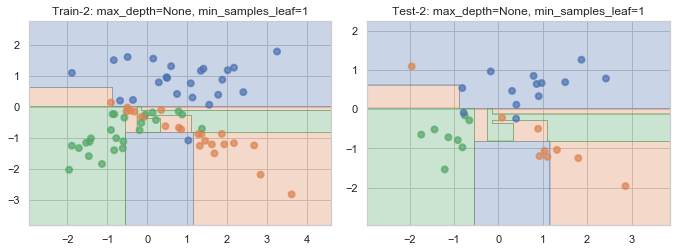

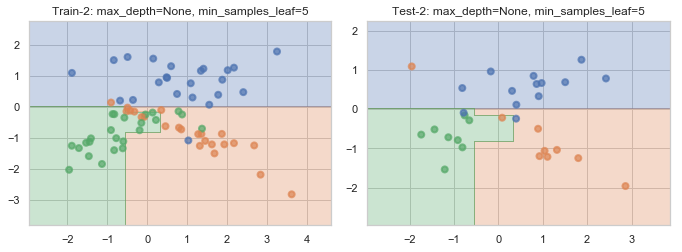

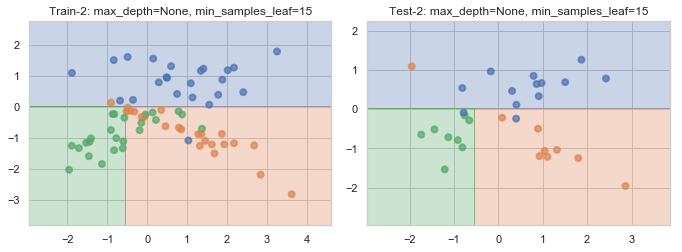

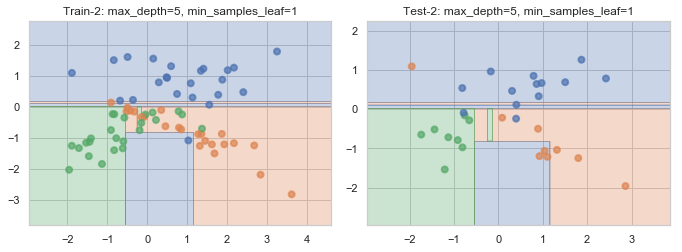

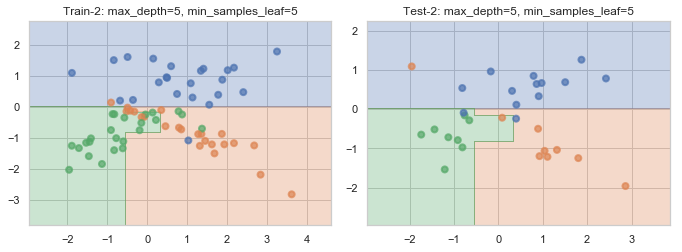

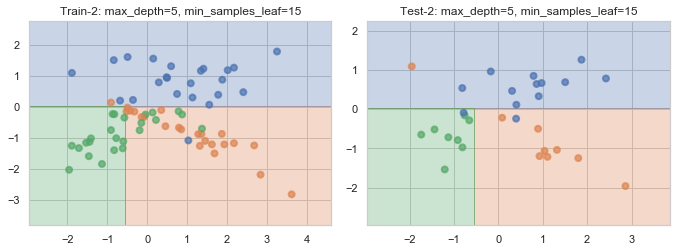

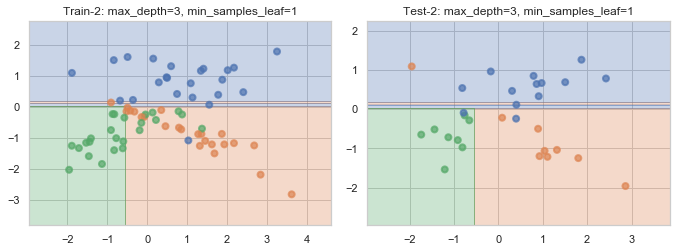

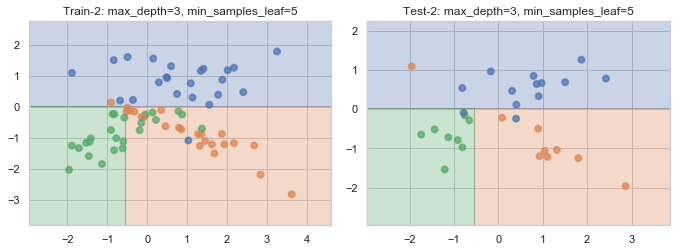

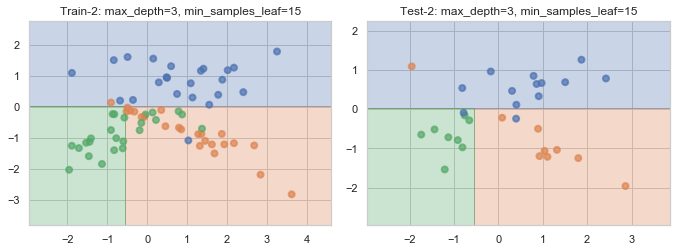

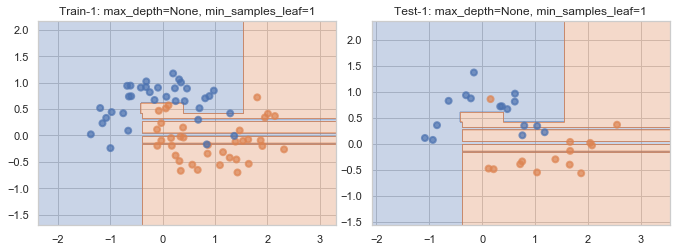

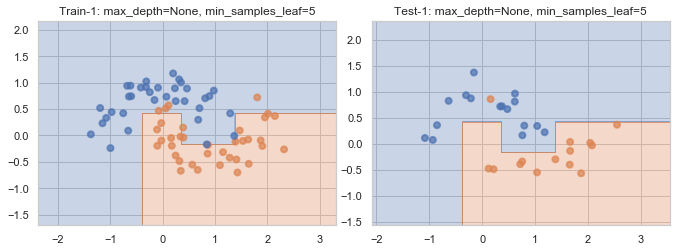

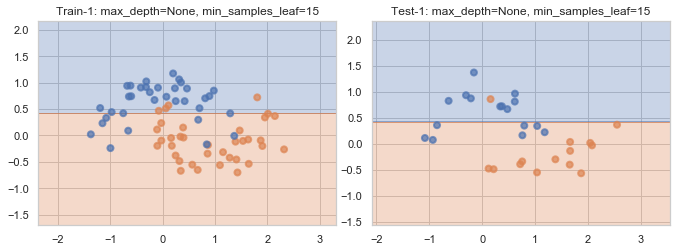

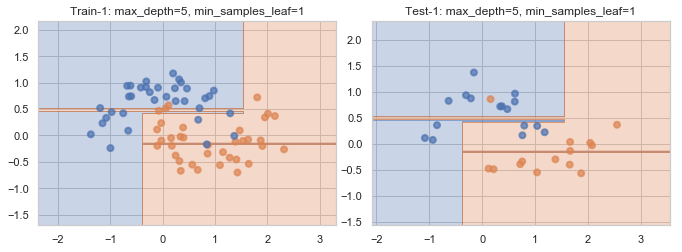

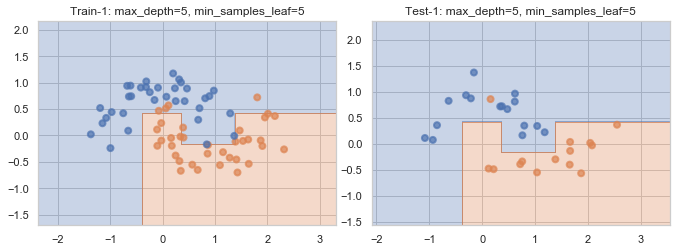

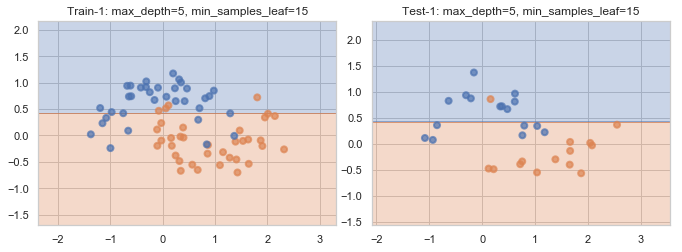

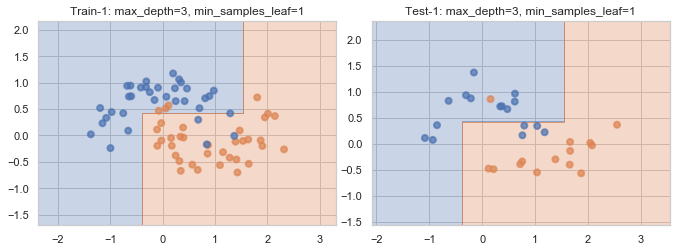

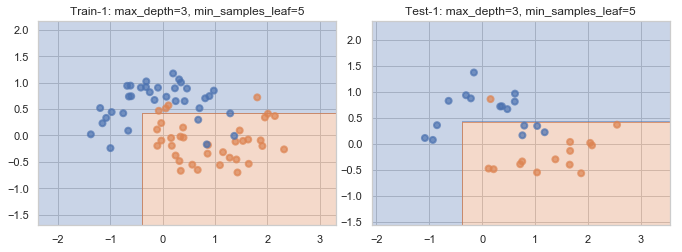

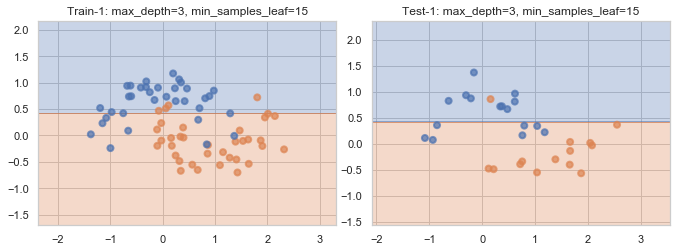

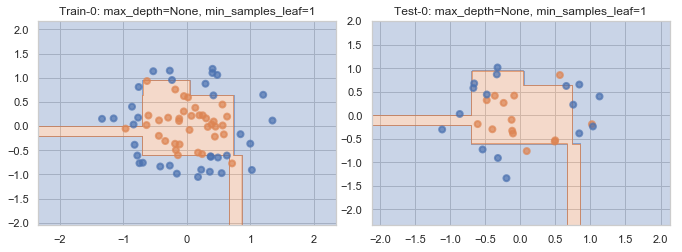

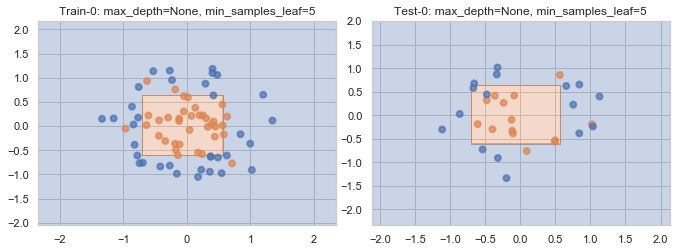

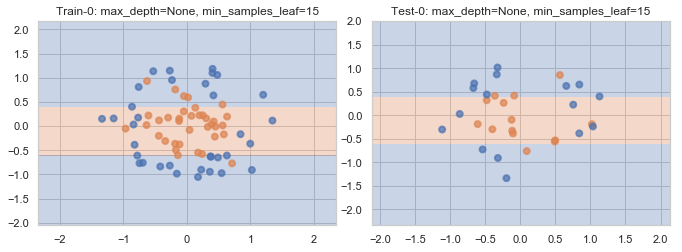

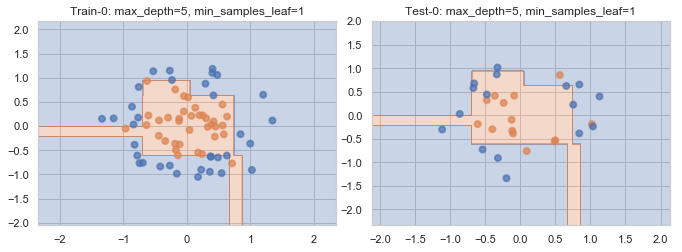

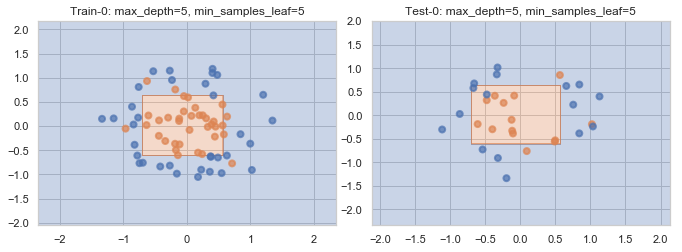

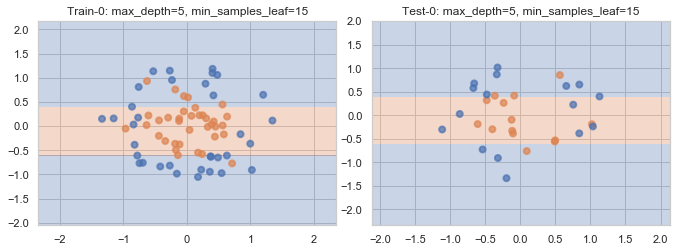

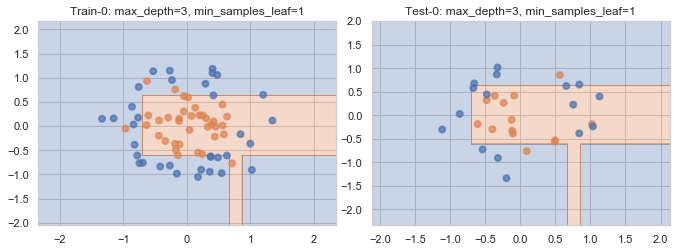

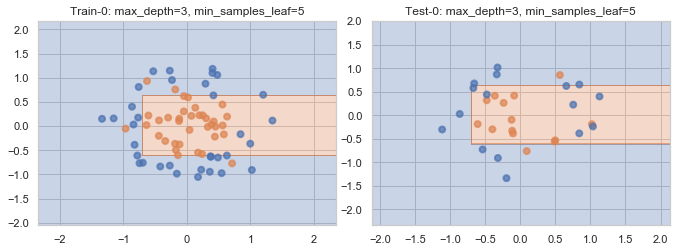

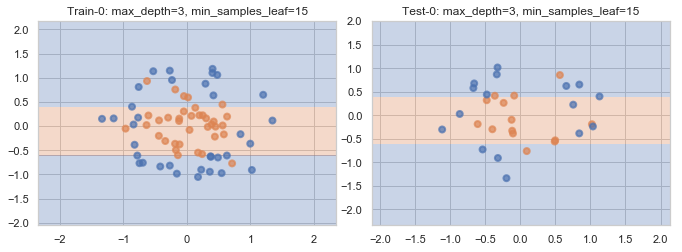

In [8]:
for i in [2, 1, 0]:
    for k, max_depth in enumerate([None, 5, 3]):
        for j, min_samples_leaf in enumerate([1, 5, 15]):
            X, y = datasets[i]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
            dr  = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=1).fit(X_train, y_train)

            print("Prediction for {} dataset (max_depth={}, min_samples_leaf={}):".format(i,max_depth,min_samples_leaf))
            print("Train accuracy = %.6f" % accuracy_score(y_train, dr.predict(X_train)))
            print("Test accuracy = %.6f\n" % accuracy_score(y_test, dr.predict(X_test)))

            plt.figure(figsize=(10, 4))
            plt.subplot(1, 2, 1)
            plot_surface(dr, X_train, y_train)
            plt.title('Train-{}: max_depth={}, min_samples_leaf={}'.format(i,max_depth,min_samples_leaf))
            plt.subplot(1, 2, 2)
            plot_surface(dr, X_test, y_test)
            plt.title('Test-{}: max_depth={}, min_samples_leaf={}'.format(i,max_depth,min_samples_leaf))

__Ответ:__
- Видим, что при уменьшении параметра максимальной глубины дерева (max_depth) и увеличении минимального числа листьев (min_samples_leaf) деревья менее склонны перербучаться
- Однако, у каждого датасета есть порог, после которого качество наоборот будет падать: например, для 0го и 1го датасетов при увеличении min_samples_leaf больше 5 качество в основном заметно ухудшается
- Таким образом, гиперпараметры деревьев необходимо подбирать, учитывая особенности выборок

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, 
    $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
    $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.
    
Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.

In [9]:
import numpy as np
from collections import Counter

def find_best_split(feature_vector, target_vector):
    """
    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)
 
    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    target_vector = target_vector[np.argsort(feature_vector)]
    feature_vector = np.sort(feature_vector)
    thresholds = (feature_vector[:-1] + feature_vector[1:])/2
    
    # Delete thresholds with empty subsets:
    thresholds = np.array([threshold\
                           for threshold in thresholds\
                           if np.sum([feature_vector >= threshold])> 0 and np.sum([feature_vector < threshold])> 0
                          ])
    
    p0_l = np.array([np.sum(target_vector[feature_vector < threshold] == 0)/\
                     len(target_vector[feature_vector < threshold])\
                     for threshold in thresholds
                    ])
    p0_r = np.array([np.sum(target_vector[feature_vector >= threshold] == 0)/\
                     len(target_vector[feature_vector >= threshold])\
                     for threshold in thresholds
                    ])
    
    left_lens = np.array([np.sum([feature_vector < threshold]) for threshold in thresholds])
    right_lens = np.array([np.sum([feature_vector >= threshold]) for threshold in thresholds])
    
    # Calc left/right impurity_criterion: 
    H_l = 1 - p0_l**2 - (1 - p0_l)**2
    H_r = 1 - p0_r**2 - (1 - p0_r)**2
 
    ginis = -left_lens/len(target_vector) * H_l - right_lens/len(target_vector) * H_r
    
    threshold_best = thresholds[np.argmax(ginis)]
    gini_best = np.max(ginis)
 
    return thresholds, ginis, threshold_best, gini_best


Ссылка на контест - https://contest.yandex.ru/contest/21899/problems/A/ (lika-shah4701)

In [10]:
# Локальный тест:
feature_vector, target_vector = np.array([[2.771244718,0],
	[1.728571309,0],
	[3.678319846,0],
	[3.961043357,0],
	[2.999208922,0],
	[7.497545867,1],
	[9.00220326,1],
	[7.444542326,1],
	[10.12493903,1],
	[6.642287351,1]]).T

find_best_split(feature_vector, target_vector)

(array([2.24990801, 2.88522682, 3.33876438, 3.8196816 , 5.30166535,
        7.04341484, 7.4710441 , 8.24987456, 9.56357115]),
 array([-0.44444444, -0.375     , -0.28571429, -0.16666667, -0.        ,
        -0.16666667, -0.28571429, -0.375     , -0.44444444]),
 5.301665354,
 -0.0)

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [11]:
df = pd.read_csv('students.csv', sep=',')
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


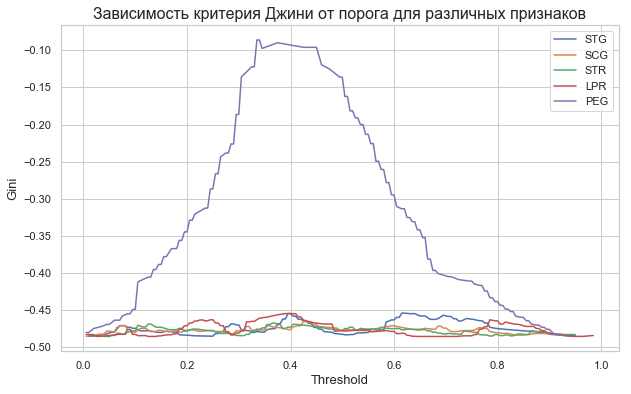

In [12]:
plt.figure(figsize=(10, 6))
lines = []
for column in df.columns[:-1]:
    split = find_best_split(df[column], df[' UNS'])
    plt.plot(split[0], split[1], label=column)
    
plt.xlabel('Threshold', fontsize = 13)
plt.ylabel('Gini', fontsize = 13)
plt.title('Зависимость критерия Джини от порога для различных признаков', fontsize = 16)
plt.legend()
plt.show()

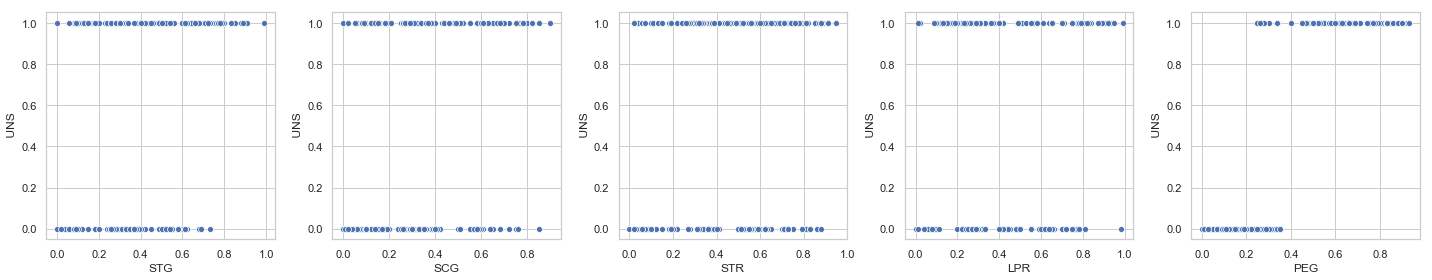

In [13]:
fig, ax = plt.subplots(1, 5, figsize=(20, 4), tight_layout=True)
ax1 = sns.scatterplot(data=df, x=df.columns[0], y=" UNS", ax=ax[0])
ax2 = sns.scatterplot(data=df, x=df.columns[1], y=" UNS", ax=ax[1])
ax3 = sns.scatterplot(data=df, x=df.columns[2], y=" UNS", ax=ax[2])
ax4 = sns.scatterplot(data=df, x=df.columns[3], y=" UNS", ax=ax[3])
ax5 = sns.scatterplot(data=df, x=df.columns[4], y=" UNS", ax=ax[4])

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**
- исходя из значений критерия Джини, лучшим признаком для деления выборок является PEG, данный результат соответствует  scatter-графикам: именно у данного критерия видно лучшее разбиение на классы в зависимости от его значений


- у кривой для хороших признаков на одном из порогов критерий Джини должен выделяться от остальных и быть довольно сильно приближен к нулю


- у кривых для признаков, у которых деление будет практически невозможно, критерий ни на одном из порогов не будет сильно отлчаться от остальных значений и не будет приближен к нулю, что можно увидеть на других признаках из примера

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [73]:
class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")
 
        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf
 
    def _fit_node(self, sub_X, sub_y, node):
        if np.all(sub_y == sub_y[0]): #sub_y != sub_y[0]
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return
 
        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(0, sub_X.shape[1]):  #range(1, sub_X.shape[1])
            feature_type = self._feature_types[feature]
            categories_map = {}
 
            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count #current_count / current_click
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1]))) # lambda x: x[1]
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))
 
                feature_vector = np.array(map(lambda x: categories_map[x], sub_X[:, feature]))
            else:
                raise ValueError
             
            if len(np.unique(feature_vector)) <= 1: #len(feature_vector) == 3:
                continue
 
            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold
 
                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":  #Categorical
                    threshold_best = list(map(lambda x: x[0], 
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0] #Counter(sub_y).most_common(1)
            return
 
        node["type"] = "nonterminal"
 
        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"]) #sub_y[split]
    
    def _predict_node(self, x, node):
        if node["type"] == "terminal":
            return node["class"]
        
        if self._feature_types[node["feature_split"]] == "real":
            if x[node["feature_split"]] < node["threshold"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"]) 
            
        elif self._feature_types[node["feature_split"]] == "categorical":
            if x[node["feature_split"]] in node["categories_split"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])  
            
        else:
            raise ValueError
 
    def fit(self, X, y):
        self._fit_node(X, y, self._tree)
 
    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)


__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [15]:
df = pd.read_csv('agaricus-lepiota.data', sep=',', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [16]:
from sklearn.preprocessing import LabelEncoder

df = df.apply(lambda col: LabelEncoder().fit_transform(col))
X, y = np.array(df[range(1,23)]), np.array(df[1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
dr  = DecisionTree(feature_types=X_train.shape[1]*['real'])
dr.fit(X_train, y_train)
print("Train accuracy = %.6f" % accuracy_score(y_train, dr.predict(X_train)))
print("Test accuracy = %.6f\n" % accuracy_score(y_test, dr.predict(X_test)))

Train accuracy = 1.000000
Test accuracy = 1.000000



__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [22]:
from sklearn.model_selection import cross_val_score, KFold 
from sklearn.metrics import make_scorer

datasets = 4*['mushrooms']+4*['tic-tac-toe']+4*['cars']+4*['nursery']
algoritms = 4*['dt_all_r','dt_all_c','dt_all_r_ohe','dtc']
accuracy_scores = []

def my_cross_val_score(X, y, cv=2, data_type='real'):
    kfold = KFold(n_splits=cv, random_state=1)
    metrics = []

    for i, (train, test) in enumerate(kfold.split(X, y)):
        X_train = X[train,:]
        X_test = X[test,:]
        y_train = y[train]
        y_test = y[test]
        dr  = DecisionTree(feature_types=X_train.shape[1]*[data_type])
        dr.fit(X_train, y_train)
        metrics.append(accuracy_score(y_test, dr.predict(X_test)))
    
    return metrics

# mushrooms dataset:
#df = df.apply(lambda col: LabelEncoder().fit_transform(col))
#X, y = np.array(df[range(1,23)]), np.array(df[1])

scores = my_cross_val_score(X, y, cv=10)
accuracy_scores.append(np.mean(scores))
np.mean(scores)

1.0

In [81]:
scores = my_cross_val_score(X, y, cv=10, data_type='categorical')
accuracy_scores.append(np.mean(scores))
np.mean(scores)

0.4499648567914251

In [93]:
from sklearn.preprocessing import OneHotEncoder

X, y = OneHotEncoder(sparse=False).fit_transform(df[range(1,23)]), np.array(df[1])
scores = my_cross_val_score(X, y)
accuracy_scores.append(np.mean(scores))
np.mean(scores)

0.8936484490398818

In [97]:
s = cross_val_score(DecisionTreeClassifier(), X, y, cv=10, 
                 scoring=make_scorer(accuracy_score)).mean()

accuracy_scores.append(s)

# Лист скоров для различных алгоритмов на примере первого датасета:
accuracy_scores

[1.0, 0.4499648567914251, 0.8936484490398818, 1.0]

In [100]:
df = pd.read_csv('tic-tac-toe.data', sep=',', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [104]:
df = df.apply(lambda col: LabelEncoder().fit_transform(col))
X, y = np.array(df[range(9)]), np.array(df[9])

#1)
scores = my_cross_val_score(X, y, cv=10)
accuracy_scores.append(np.mean(scores))

#2)
scores = my_cross_val_score(X, y, cv=10, data_type='categorical')
accuracy_scores.append(np.mean(scores))

#3)
X, y = OneHotEncoder(sparse=False).fit_transform(df[range(9)]), np.array(df[9])
scores = my_cross_val_score(X, y)
accuracy_scores.append(np.mean(scores))

#4)
s = cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()
accuracy_scores.append(s)

accuracy_scores

[1.0,
 0.4499648567914251,
 0.8936484490398818,
 1.0,
 0.4675328947368421,
 0.6520833333333333,
 0.1544885177453027,
 0.8310745614035087]

In [106]:
df = pd.read_csv('car.data', sep=',', header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [108]:
df = df.apply(lambda col: LabelEncoder().fit_transform(col))
X, y = np.array(df[range(6)]), np.array(df[6])

#1)
scores = my_cross_val_score(X, y, cv=10)
accuracy_scores.append(np.mean(scores))

#2)
scores = my_cross_val_score(X, y, cv=10, data_type='categorical')
accuracy_scores.append(np.mean(scores))

#3)
X, y = OneHotEncoder(sparse=False).fit_transform(df[range(6)]), np.array(df[6])
scores = my_cross_val_score(X, y)
accuracy_scores.append(np.mean(scores))

#4)
s = cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()
accuracy_scores.append(s)

accuracy_scores

[1.0,
 0.4499648567914251,
 0.8936484490398818,
 1.0,
 0.4675328947368421,
 0.6520833333333333,
 0.1544885177453027,
 0.8310745614035087,
 0.8697506385266836,
 0.7000806560021509,
 0.6753472222222222,
 0.8391752923780078]

In [110]:
df = pd.read_csv('nursery.data', sep=',', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [113]:
df = df.apply(lambda col: LabelEncoder().fit_transform(col))
X, y = np.array(df[range(8)]), np.array(df[8])

#1)
scores = my_cross_val_score(X, y)
accuracy_scores.append(np.mean(scores))

#2)
scores = my_cross_val_score(X, y, data_type='categorical')
accuracy_scores.append(np.mean(scores))

#3)
X, y = OneHotEncoder(sparse=False).fit_transform(df[range(8)]), np.array(df[8])
scores = my_cross_val_score(X, y)
accuracy_scores.append(np.mean(scores))

#4)
s = cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()
accuracy_scores.append(s)


In [114]:
info_df = pd.DataFrame([])
info_df['dataset'] = datasets
info_df['algoritm'] = algoritms
info_df['accuracy_score'] = accuracy_scores
info_df

,dataset,algoritm,accuracy_score
0,mushrooms,dt_all_r,1.000000
1,mushrooms,dt_all_c,0.449965
2,mushrooms,dt_all_r_ohe,0.893648
3,mushrooms,dtc,1.000000
4,tic-tac-toe,dt_all_r,0.467533
5,tic-tac-toe,dt_all_c,0.652083
6,tic-tac-toe,dt_all_r_ohe,0.154489
7,tic-tac-toe,dtc,0.831075
8,cars,dt_all_r,0.869751
9,cars,dt_all_c,0.700081


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

- Результаты работы алгоритмов на разных наборах данных выглядят различно: необходимо учитывать сущность подаваемых на вход признаков и в зависимости от этого при необходимости применять различные виды кодировок, ведь, например, в датасете nursery представление признаков в качестве категориальных существенно ухудшило результаты, ведь часть признаков явно имели линейную зависимость от таргета, а в датасете tic-tac-toe наоборот - улучшило


- Да, в результатах присутстсвует компонента случайности: если посмотреть на лист скоров в результате кросс-валидации на примере одного из наборов данных (см. ниже), точность там явно скачет


- Для улучшения работы алгоритмов можно попробовать подобрать гиперпараметры модели: максимальная глубина дерева, минимальное число листьев в узле и т.д.

In [117]:
cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring=make_scorer(accuracy_score))

array([0.7345679 , 0.96141975, 0.70216049, 0.89814815, 0.63348765,
       0.86728395, 0.88888889, 0.63425926, 0.78858025, 0.68055556])

Вставьте что угодно, описывающее ваши впечатления от этого задания: